In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

In [64]:
df_ROS_Analysis = pd.read_csv('../../dataset/RecurrenceOfSurgeryAnalysis.csv')
df_ROS_Analysis.head(2)

,Unnamed: 0,입원기간,환자통증정도,통증기간(월),Instability,수술기법,수술시간,수술실패여부,디스크단면적,MF + ES,고혈압여부,과거수술횟수,당뇨여부,우울증여부,체중,신장,성별,연령,헤모글로빈수치,Large Lymphocyte
0,0,2,10,1.0,0,TELD,68.0,0,2048.5,1824.6,0,0,0,0,60.3,163,2,66,13.66,22.8
1,1,1,10,1.0,0,TELD,31.0,0,1753.1,1737.5,0,0,0,0,71.7,171,1,47,13.73,44.9


In [65]:
df_ROS_Analysis_Surgery = df_ROS_Analysis[['입원기간', '환자통증정도', '통증기간(월)', 'Instability', '수술기법', '수술시간', '수술실패여부', '디스크단면적']]
df_ROS_Analysis_Surgery

,입원기간,환자통증정도,통증기간(월),Instability,수술기법,수술시간,수술실패여부,디스크단면적
0,2,10,1.0,0,TELD,68.0,0,2048.50
1,1,10,1.0,0,TELD,31.0,0,1753.10
2,1,7,1.0,0,TELD,78.0,0,1749.00
3,1,7,2.0,0,TELD,73.0,0,1796.20
4,2,7,1.0,0,TELD,29.0,0,2021.48
...,...,...,...,...,...,...,...,...
1748,12,7,24.0,0,TELD,35.0,0,1813.00
1749,2,8,36.0,0,TELD,60.0,0,2167.60
1750,3,6,6.0,1,TELD,70.0,0,2250.80
1751,3,8,4.0,0,TELD,45.0,0,2258.80


In [66]:
df_ROS_Analysis_Surgery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   입원기간         1753 non-null   int64  
 1   환자통증정도       1753 non-null   int64  
 2   통증기간(월)      1753 non-null   float64
 3   Instability  1753 non-null   int64  
 4   수술기법         1753 non-null   object 
 5   수술시간         1753 non-null   float64
 6   수술실패여부       1753 non-null   int64  
 7   디스크단면적       1753 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 109.7+ KB


In [70]:
df_ROS_Analysis_Surgery.describe()

,입원기간,통증기간(월),수술시간,디스크단면적
count,1753.000000,1753.000000,1753.000000,1753.000000
mean,1.652596,5.460297,62.309755,1988.492048
std,1.895897,16.810080,25.072917,312.873914
min,0.000000,0.000000,5.000000,1145.800000
25%,1.000000,1.000000,45.000000,1777.000000
50%,1.000000,2.000000,60.000000,1988.040000
75%,2.000000,3.500000,78.000000,2177.120000
max,46.000000,360.000000,220.000000,3166.140000


In [71]:
df_ROS_Analysis_Surgery.describe(include='object')

,환자통증정도,Instability,수술기법,수술실패여부
count,1753,1753,1753,1753
unique,10,2,2,2
top,7,0,TELD,0
freq,800,1680,1617,1645


# 데이터 타입

- 범주형: 환자 통증 정도(순서형), Instability, 수술실패여부, 수술기법
- 연속형: 입원기간, 통증기간(월), 수술시간, 디스크단면적

In [72]:
# object 변환대상:환자통증정도, Instability, 수술실패여부
df_ROS_Analysis_Surgery[['환자통증정도', 'Instability','수술실패여부']] = df_ROS_Analysis_Surgery[['환자통증정도', 'Instability','수술실패여부']].astype(object)

C:\Users\5-21\AppData\Local\Temp\ipykernel_25436\2184084431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_Analysis_Surgery[['환자통증정도', 'Instability','수술실패여부']] = df_ROS_Analysis_Surgery[['환자통증정도', 'Instability','수술실패여부']].astype(object)


# EDA 상관관계 확인 

- 목표변수: '입원기간'
- 설명변수: '환자통증정도', '통증기간(월)', 'Instability', '수술기법', '수술시간', '수술실패여부', '디스크단면적

    - '환자통증정도':
    - '통증기간(월)':
    - 'Instability':
    - '수술기법':
    - '수술시간':
    - '수술실패여부':
    - '디스크단면적':
    
- 분석스토리: 
 

# 단일 변수 시각화 

- 단일변수 / 연속형: histplot - 입원기간, 통증기간(월), 수술시간, 디스크단면적
- 단일변수 / 범주형: barplot (countplot) - Instability, 수술실패여부, 수술기법
- 단일변수 / 순서형: lineplot - 환자 통증 정도

In [76]:
#단일변수 / 연속형: histplot - 입원기간, 통증기간(월), 수술시간, 디스크단면적
surgery_continuous_list = df_ROS_Analysis_Surgery[['입원기간','통증기간(월)', '수술시간', '디스크단면적']].describe().columns.to_list()
surgery_continuous_list

['입원기간', '통증기간(월)', '수술시간', '디스크단면적']

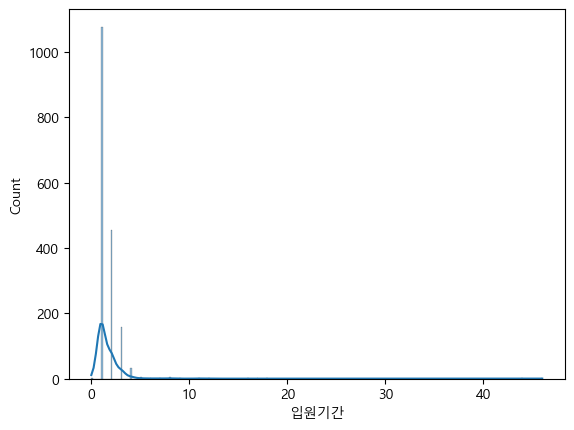

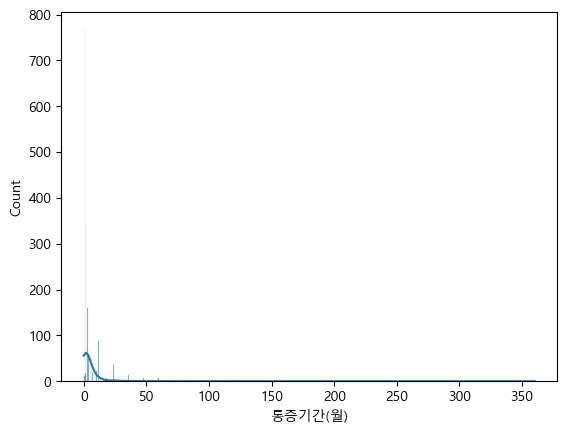

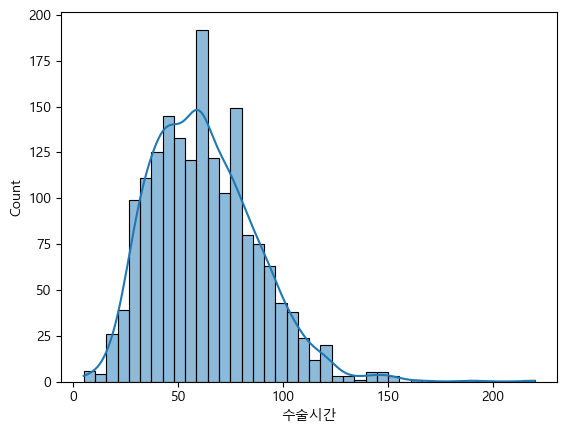

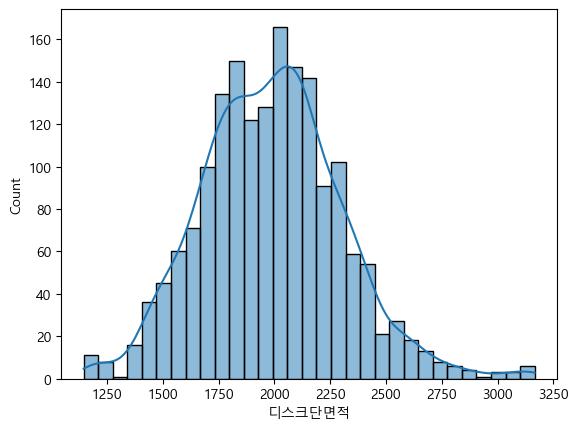

In [78]:
for item in surgery_continuous_list :
    sns.histplot(data=df_ROS_Analysis_Surgery, x=item, kde=True)
    plt.show()

In [80]:
#단일변수 / 범주형: barplot (countplot) - Instability, 수술실패여부, 수술기법
surgery_category_list = df_ROS_Analysis_Surgery[['Instability', '수술실패여부', '수술기법']].describe().columns.to_list()
surgery_category_list

['Instability', '수술실패여부', '수술기법']

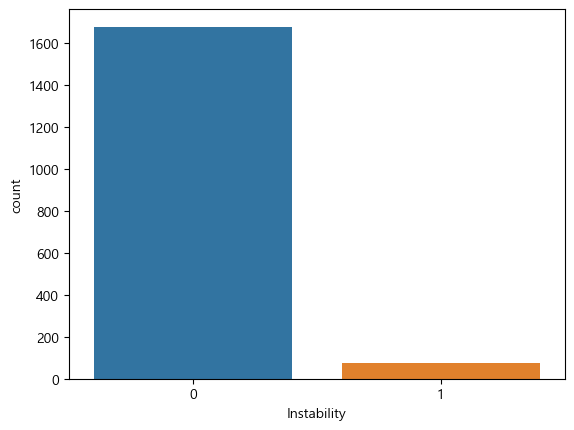

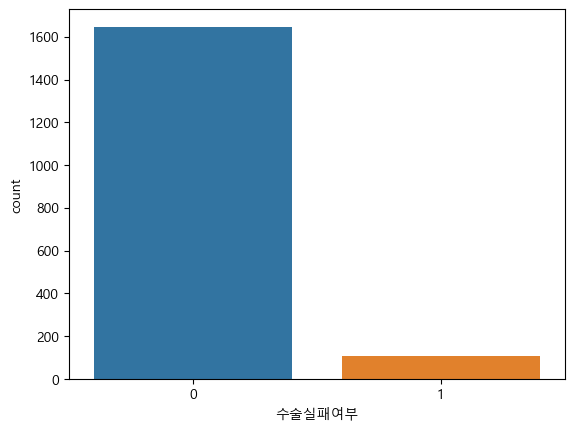

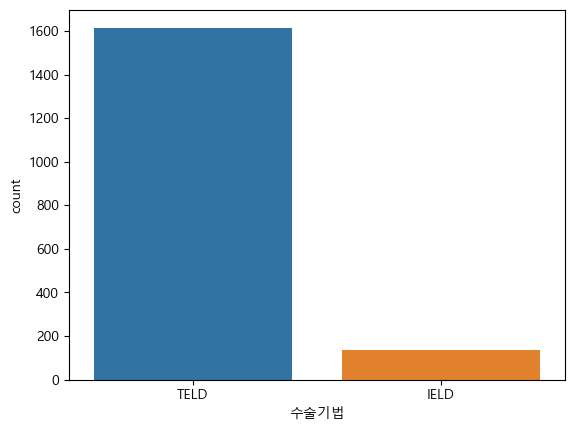

In [85]:
for item in surgery_category_list :
    sns.countplot(data=df_ROS_Analysis_Surgery, x=item)
    plt.show()

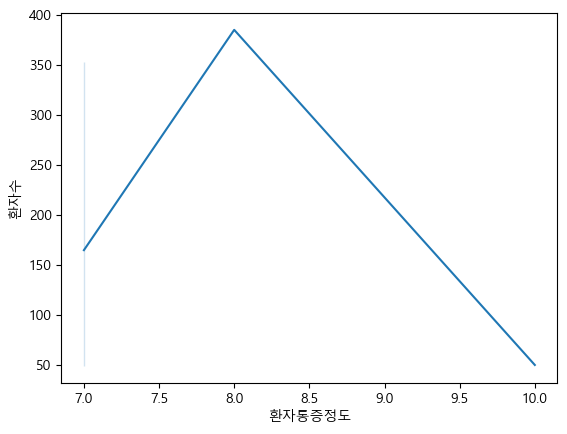

In [92]:
#단일변수 / 순서형: lineplot - 환자 통증 정도
sns.lineplot(data=df_ROS_Analysis_Surgery, x='환자통증정도', y=df_ROS_Analysis_Surgery['환자통증정도'].value_counts())
plt.ylabel("환자수")
plt.show()

# 다변수 시각화 

- 연속형-연속형: scatterplot (lineplot) 
        입원기간-통증기간(월) / 입원기간-수술시간 / 입원기간-디스크단면적
    
- 연속형-범주형: barplot
        입원기간-Instability / 입원기간-수술실패여부 / 입원기간-수술기법
    
- 연속형-순서형: lineplot 
        입원기간-환자 통증 정도